In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Load in fire stations & census blocks
stations = gpd.read_file('./data/Fire_Stations.geojson')
blocks = gpd.read_file('./data/arcgisCensusBlocks.geojson')

In [3]:
print(stations.crs)
print(blocks.crs)

epsg:4326
epsg:4326


In [4]:
stations.head()

,OBJECTID,PERMANENT_IDENTIFIER,SOURCE_FEATUREID,SOURCE_DATASETID,SOURCE_DATADESC,SOURCE_ORIGINATOR,DATA_SECURITY,DISTRIBUTION_POLICY,LOADDATE,FTYPE,...,ADDRESSBUILDINGNAME,ADDRESS,CITY,STATE,ZIPCODE,GNIS_ID,FOOT_ID,COMPLEX_ID,GLOBALID,geometry
0,1,87259e63-d2f9-4d3b-8de5-1f95e0447d12,9999999999,{CC44F99C-6658-4584-B606-926E498D5C82},TNMC VWE DB Build - Vol Update,U.S. Geological Survey,5,E4,2016-08-12T14:05:14+00:00,740,...,None,8700 Hospital Dr,Douglasville,GA,30134,None,None,None,{8C831D9D-B4DA-4159-9E8F-5B7C878D78C0},POINT (-84.72990 33.74307)
1,2,814e6dcd-fcdf-41de-9ad6-2c92eec64da5,9999999999,{CC44F99C-6658-4584-B606-926E498D5C82},TNMC VWE DB Build - Vol Update,U.S. Geological Survey,5,E4,2016-08-12T14:05:14+00:00,740,...,None,123 Silver Bluff Road,Aiken,SC,29801,None,None,None,{B6AEA169-E22A-4DD8-8BE4-C2843B91747C},POINT (-81.72463 33.52813)
2,3,{A445F01B-56B4-4806-B97D-D64DDABF3515},None,{CC44F99C-6658-4584-B606-926E498D5C82},TNMC VWE DB Build - Vol Update,U.S. Geological Survey,5,E4,2016-07-27T00:00:00+00:00,740,...,None,161 HWY 25,Conway,AR,72032,None,None,None,{5FFD726A-C8FA-4FC0-BB6C-90E83A648BE0},POINT (-92.45724 35.14009)
3,4,{E4293C16-8DD0-48A8-8CEA-9561EA55334B},None,{CC44F99C-6658-4584-B606-926E498D5C82},TNMC VWE DB Build - Vol Update,U.S. Geological Survey,5,E4,2016-07-27T00:00:00+00:00,740,...,None,1 CARDIN CIR,Enola,AR,72047,None,None,None,{B9AC844E-0B5B-415A-9CCD-030865009498},POINT (-92.20540 35.24607)
4,5,{AFB434D5-53A8-4926-8B9F-B35964205B5C},None,{CC44F99C-6658-4584-B606-926E498D5C82},TNMC VWE DB Build - Vol Update,U.S. Geological Survey,5,E4,2016-07-27T00:00:00+00:00,740,...,None,"10214 US 64 East,",Apex,NC,27523,None,None,None,{F2E72EEB-39B3-481B-B022-7CA5E8DD0763},POINT (-79.00539 35.73679)


In [5]:
blocks.head()

,OBJECTID,AREALAND,AREAWATER,BASENAME,BLKGRP,BLOCK,CENTLAT,CENTLON,COUNTY,FUNCSTAT,...,ObjID,STATE,SUFFIX,TRACT,UR,HU100,POP100,SHAPE_Length,SHAPE_Area,geometry
0,382512,10765.0,0.0,1004,1,1004,+42.1253541,-088.0432581,031,S,...,210701006232286,17,None,803604,None,0.0,0.0,0.004724,1.172067e-06,"MULTIPOLYGON (((-88.04378 42.12625, -88.04364 ..."
1,382513,6240.0,0.0,1000,1,1000,+42.1249884,-088.0400862,031,S,...,210701006232287,17,None,803604,None,0.0,0.0,0.004156,6.793596e-07,"MULTIPOLYGON (((-88.04107 42.12482, -88.04087 ..."
2,382514,13289.0,0.0,4007,4,4007,+42.1283062,-088.0219304,031,S,...,210701006232288,17,None,803605,None,0.0,0.0,0.009855,1.447040e-06,"MULTIPOLYGON (((-88.02408 42.12831, -88.02408 ..."
3,382515,43305.0,0.0,1006,1,1006,+42.1346401,-088.0252379,031,S,...,210701006232289,17,None,803605,None,17.0,56.0,0.008623,4.715658e-06,"MULTIPOLYGON (((-88.02646 42.13379, -88.02645 ..."
4,382516,311638.0,0.0,1009,1,1009,+42.0332301,-087.7910624,031,S,...,210701006232290,17,None,808301,None,0.0,0.0,0.043847,3.388186e-05,"MULTIPOLYGON (((-87.79451 42.03325, -87.79448 ..."


In [6]:
assert not blocks['GEOID'].duplicated().any()
blocks.set_index('GEOID',inplace=True)

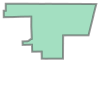

In [7]:
# filter the stations for only Chicago stations
allBlocksReg = blocks.unary_union
display(allBlocksReg)
inChi = stations['geometry'].within(allBlocksReg)

# Naive method. Takes >13 min (but then again, that was when I had a typo that coulda caused many problems
# idx = stations['geometry'].apply(lambda pt: pt.within(blocks['geometry']).any())

In [8]:
# comparing a few different ways to filter for stations in chicago
N = 100
%timeit stations.loc[:N,'geometry'].within(allBlocksReg)
hull = allBlocksReg.convex_hull
%timeit stations.loc[:N,'geometry'].within(hull) # then I would need to do a second filter
%timeit stations.loc[:N,'geometry'].apply(lambda pt: pt.within(blocks['geometry']).any())

print(stations.loc[:N,'geometry'].within(allBlocksReg).equals(stations.loc[:N,'geometry'].apply(lambda pt: pt.within(blocks['geometry']).any())))

3.89 ms ± 382 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.09 ms ± 144 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


C:\Users\aance\anaconda3\envs\geoEnv\lib\site-packages\geopandas\geoseries.py:574: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)
C:\Users\aance\anaconda3\envs\geoEnv\lib\site-packages\geopandas\geoseries.py:574: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)
C:\Users\aance\anaconda3\envs\geoEnv\lib\site-packages\geopandas\geoseries.py:574: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dt

1.26 s ± 86.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


C:\Users\aance\anaconda3\envs\geoEnv\lib\site-packages\geopandas\geoseries.py:574: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


True


In [9]:
print(inChi.sum())
print(stations.loc[inChi,'STATE'].unique())
print(stations.loc[inChi,'CITY'].unique())

328
['IL']
['Bridgeview' 'Lemont' 'Chicago' 'Lincolnwood' 'Winnetka' 'Berkeley'
 'Evanston' 'Niles' 'Franklin Park' 'Wheeling' 'Northbrook'
 'South Chicago Heights' 'Country Club Hills' 'Homewood' 'Crestwood'
 'Lagrange' 'Posen' 'Hillside' 'Palos Hills' 'Sauk Village' 'Phoenix'
 'South Holland' 'La Grange' 'Markham' 'Stickney' 'Cicero'
 'Arlington Heights' 'Elmwood Park' 'Calumet Park' 'Bedford Park' 'Steger'
 'Park Forest' 'Oak Forest' 'Summit' 'Maywood' 'Justice' 'Chicago Heights'
 'Glenwood' 'Palos Park' 'Orland Park' 'Harvey' 'Forest Park' 'Northfield'
 'Robbins' 'Riverdale' 'Skokie' 'Burnham' 'Lynwood' 'Schiller Park'
 'Prospect Heights' 'Worth' 'Morton Grove' 'Westchester' 'Des Plaines'
 'Park Ridge' 'Mount Prospect' 'Riverside' 'Berwyn' 'Harwood Heights'
 'Wilmette' 'Hodgkins' 'Oak Park' 'Bellwood' 'Mccook' 'Matteson'
 'Midlothian' 'Thornton' 'East Hazel Crest' 'Lansing' 'Richton Park'
 'Countryside' 'Hazel Crest' 'Dixmoor' 'North Riverside' 'Palos Heights'
 'Melrose Park' 'Calu

C:\Users\aance\anaconda3\envs\geoEnv\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

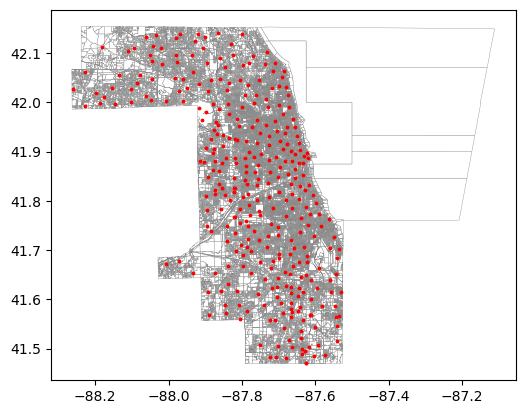

In [10]:
fig,ax = plt.subplots(1,1,figsize=(6,8))
ax = blocks.plot(ax=ax,color='white',edgecolor='gray',linewidth=0.25)
stations.loc[inChi].plot(ax=ax,color='red',markersize=3)

In [15]:
blocks.loc[blocks['BASENAME'] == '1000',['BLOCK','TRACT']]

,BLOCK,TRACT
GEOID,,
170318036041000,1000,803604
170313902001000,1000,390200
170312801001000,1000,280100
170318070001000,1000,807000
170312431001000,1000,243100
...,...,...
170318255051000,1000,825505
170318300031000,1000,830003
170314909021000,1000,490902


Now we compute the block centroids and compare with the 'CENTLAT' and 'CENTLON' columns that come downloaded

In [85]:
blocks[['CENTLON','CENTLAT']] = blocks[['CENTLON','CENTLAT']].astype(float)
gpdCentroids = blocks.centroid
d = (blocks['CENTLON'] - gpdCentroids.x)**2 + (blocks['CENTLAT'] - gpdCentroids.y)**2
d.describe()

C:\Users\aance\AppData\Local\Temp\ipykernel_30032\1476854929.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gpdCentroids = blocks.centroid


count    8.301800e+04
mean     4.168443e-13
std      6.108920e-11
min      1.005114e-20
25%      8.171064e-16
50%      1.642573e-15
75%      2.527480e-15
max      1.220188e-08
dtype: float64

In [ ]:
# Using a heuristic of a 1 degree change on the order of 1e6 meters,
# (obtained from https://www.quora.com/How-many-meters-is-1-degree-latitude)
# the above shows that we are at worst off by 1e-2 meters. So as long as we're
# consistent, I don't think it should matter which source we use...
# but maybe it is best if we use the provided centroids, since they will be
# consistent w/ anyone else using this data set?
# SERIOUS CAVEAT: These distances were calculated naively, just using L2 distance between lat/lons

In [67]:
# blocksProj = blocks.to_crs('epsg:26916')

In [77]:
blocks.iloc[0]

OBJECTID                                                   382512
AREALAND                                                  10765.0
AREAWATER                                                     0.0
BASENAME                                                     1004
BLKGRP                                                          1
BLOCK                                                        1004
CENTLAT                                               +42.1253541
CENTLON                                              -088.0432581
COUNTY                                                        031
FUNCSTAT                                                        S
INTPTLAT                                              +42.1253541
INTPTLON                                             -088.0432581
LSADC                                                          BK
LWBLKTYP                                                        L
MTFCC                                                       G5040
NAME      

In [78]:
blocks.head().centroid

C:\Users\aance\AppData\Local\Temp\ipykernel_30032\1853958446.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  blocks.head().centroid


GEOID
170318036041004    POINT (-88.04326 42.12535)
170318036041000    POINT (-88.04009 42.12499)
170318036054007    POINT (-88.02193 42.12831)
170318036051006    POINT (-88.02524 42.13464)
170318083011009    POINT (-87.79106 42.03323)
dtype: geometry

In [79]:
blocks.head().centroid.x

C:\Users\aance\AppData\Local\Temp\ipykernel_30032\3549980921.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  blocks.head().centroid.x


GEOID
170318036041004   -88.043258
170318036041000   -88.040086
170318036054007   -88.021930
170318036051006   -88.025238
170318083011009   -87.791062
dtype: float64

In [81]:
blocks['CENTLON'].head()

GEOID
170318036041004    -088.0432581
170318036041000    -088.0400862
170318036054007    -088.0219304
170318036051006    -088.0252379
170318083011009    -087.7910624
Name: CENTLON, dtype: object

In [82]:
blocks.centroid.x.head()

C:\Users\aance\AppData\Local\Temp\ipykernel_30032\2934388110.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  blocks.centroid.x.head()


GEOID
170318036041004   -88.043258
170318036041000   -88.040086
170318036054007   -88.021930
170318036051006   -88.025238
170318083011009   -87.791062
dtype: float64

In [84]:
blocks['CENTLON'].astype(float).iloc[0]

-88.0432581

### The below is code I wrote during 1/29/2024 meeting

In [16]:
# load in city boundaries, from the Chicago Data Portal
bound = gpd.read_file('Boundaries - City.geojson')

C:\Users\aance\anaconda3\envs\geoEnv\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
C:\Users\aance\anaconda3\envs\geoEnv\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

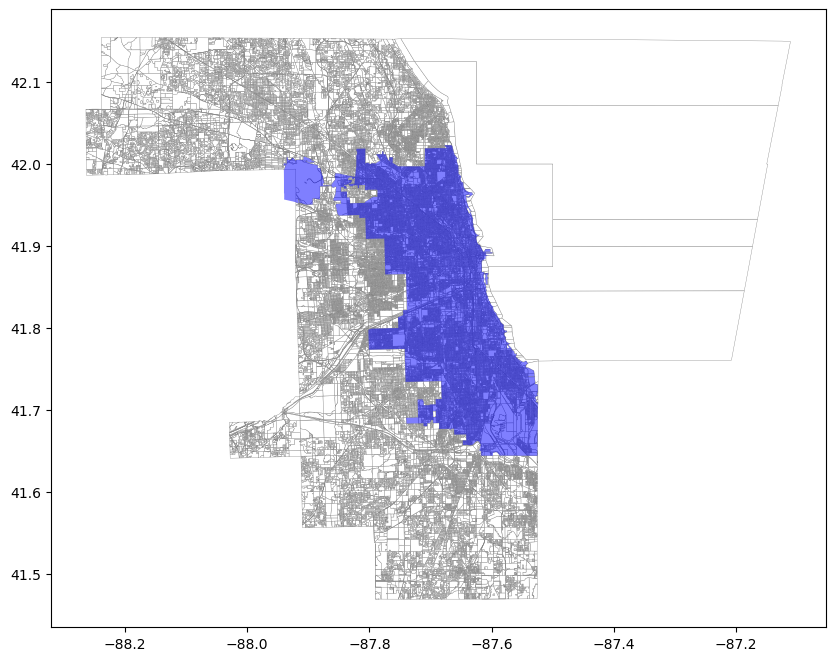

In [33]:
# plot the census blocks (from archGIS) and the boundary together
fig,ax = plt.subplots(1,1,figsize=(10,10))
blocks.plot(ax=ax,color='white',edgecolor='grey',linewidth=0.25)
bound.plot(ax=ax,color='blue',alpha=0.5)

In [21]:
# to compare, load in the Chicago Data Portal's census blocks list and plot them over the city boundary
citySource = gpd.read_file('./data/chicPortalCensusBlocks.geojson')

C:\Users\aance\anaconda3\envs\geoEnv\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
C:\Users\aance\anaconda3\envs\geoEnv\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

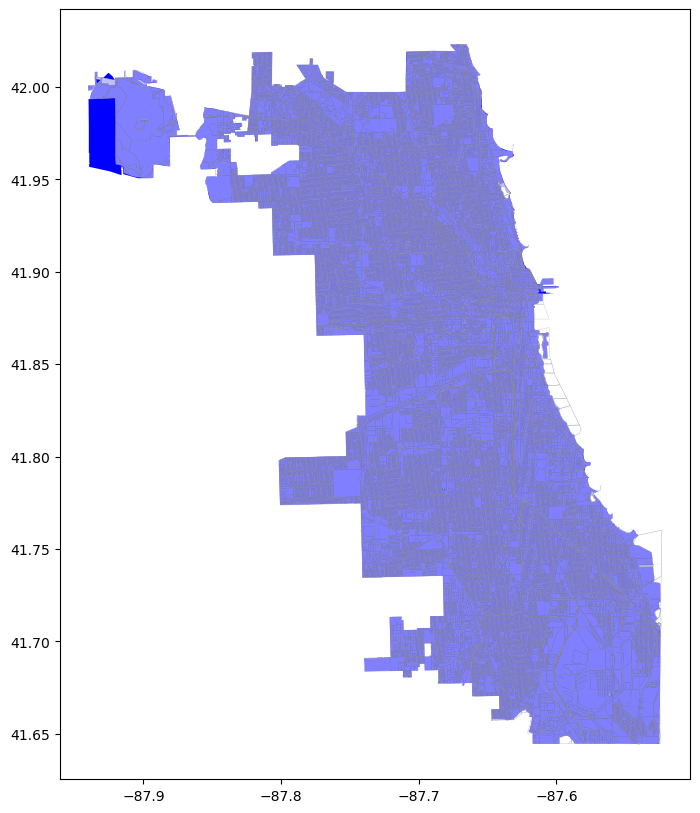

In [23]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
bound.plot(ax=ax,color='blue')
citySource.plot(ax=ax,color='white',edgecolor='grey',linewidth=0.25,alpha=0.5)

In [28]:
# find the arcGIS blocks in the city boundary and plot just them with the boundary
inCityBounds = blocks['geometry'].within(bound.loc[0,'geometry'])

In [31]:
inCityBounds.sum(),len(blocks)

(37969, 83018)

C:\Users\aance\anaconda3\envs\geoEnv\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
C:\Users\aance\anaconda3\envs\geoEnv\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

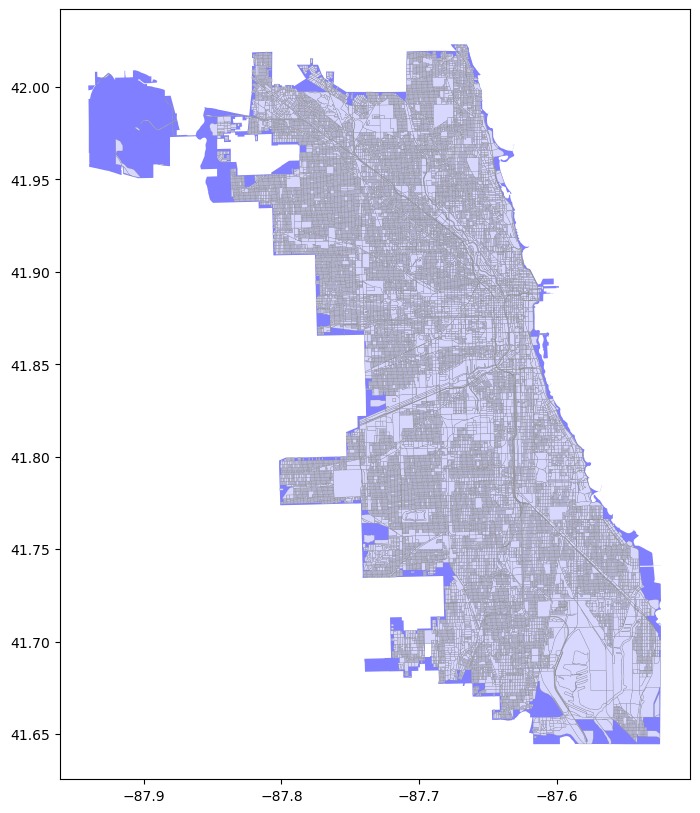

In [32]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
bound.plot(ax=ax,color='blue',alpha=0.5)
blocks.loc[inCityBounds].plot(ax=ax,color='white',edgecolor='grey',linewidth=0.25,alpha=0.7)
